## How to read a book in Python

Text is among the most important types of data. The discipline that reasons about text written by humans is called _natural language processing_ (NLP). NLP draws on computer science, linguistics, ...

Let's get a quick whiff on how we can import and manipulate text using basic Python. 


We need the following imports. The first is for numeric processing, the second for plotting and the last for processing text. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re

We start by reading the content of the book. We also define what we believe is a reasonable estimate of the number of characters on a page. This allows us to estimate the number of pages in the book.

In [6]:
book_file = open("../data/around-the-world.txt", "r")
book = book_file.read()
book_file.close()

avg_chars_per_page = 1250
print("This book has an estimated", len(book) / avg_chars_per_page, "pages")


This book has an estimated 310.752 pages


In [9]:
book[0:1000]

'The Project Gutenberg eBook of Around the World in Eighty Days, by Jules Verne\n\nThis eBook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever. You may copy it, give it away or re-use it under the terms\nof the Project Gutenberg License included with this eBook or online at\nwww.gutenberg.org. If you are not located in the United States, you\nwill have to check the laws of the country where you are located before\nusing this eBook.\n\nTitle: Around the World in Eighty Days\n\nAuthor: Jules Verne\n\nTranslator: G. M. Towle\n\nRelease Date: January, 1994 [eBook #103]\n[Most recently updated: August 6, 2021]\n\nLanguage: English\n\nCharacter set encoding: UTF-8\n\n\n*** START OF THE PROJECT GUTENBERG EBOOK AROUND THE WORLD IN EIGHTY DAYS ***\n\n[Illustration]\n\n\n\n\nAround the World in Eighty Days\n\nby Jules Verne\n\n\nContents\n\n CHAPTER I. IN WHICH PHILEAS FOGG AND PASSEPARTOUT ACCEPT EAC

Looking at the first few words, we see that chapters are separated by the pattern "CHAPTER". We also find that the patter `***` is used to separate project info from the actual content of the text. 
We use this to split the text into chapters.

In [11]:
chapters_ = re.split("CHAPTER |\*\*\* END OF THE ", book)
chapters_[2]
chapters = chapters_[38:]


The magic in above cell is done by the line `re.split` which splits the text by a given pattern, called a *regular expression*. We see this in action in the line below. 

In [13]:
test_text = "bla 1: this is something... bla 2: then something else... bla 3: even more somethings"
re.split("bla ", test_text)

['',
 '1: this is something... ',
 '2: then something else... ',
 '3: even more somethings']

Lets try to get some more insights into the book. We start by counting the number of characters in each chapter and also count the number of periods. We can use this to estimate the number of sentences in each chapter.
As we also know from prior knowledge, that the term `Mr.` is used a lot, we subtract this from the number of periods to get a better estimate of the number of sentences.

In [15]:
n_chars = []
n_periods = []
for chapter in chapters:
    n_chars.append(len(chapter))
    n_periods.append(chapter.count(".") - chapter.count("Mr."))

Let's plot it.

122.36638969141632

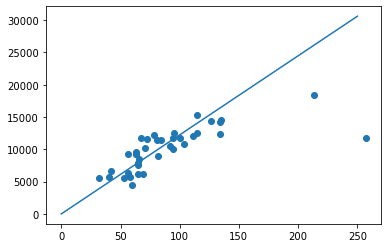

In [16]:
plt.scatter(n_periods, n_chars)

# a silly regression
alpha = [ n_chars[idx] / n_periods[idx] for idx in range(len(n_chars)) ]
alpha = sum(alpha) / len(n_chars)
plt.plot([0, 250], [0, 250*alpha])
alpha

# note to myself: hey this is robust

We immediately see that there are two outliers. Try to find out what they are.

Next we get an idea of the story line by checking how often each of the main characters (that is Fogg, Passepartout and Fix) occur in each chapter. 

In [20]:
fogg, ppt, fix = [0], [0], [0]
for chapter in chapters:
    fogg.append(fogg[len(fogg) - 1] + chapter.count("Fogg"))
    ppt.append(ppt[len(ppt) - 1] + chapter.count("Passepartout"))
    fix.append(fix[len(fix) - 1] + chapter.count("Fix"))

In [21]:
characters = ["Fogg", "Passepartout", "Fix", "Aouda", "Mudge"]
appearances = {key: list([0]) for key in characters}

for chapter in chapters:
    for character in characters:
        runsum = appearances[character][len(appearances[character]) - 1]
        appearances[character].append(0*runsum + chapter.count(character))


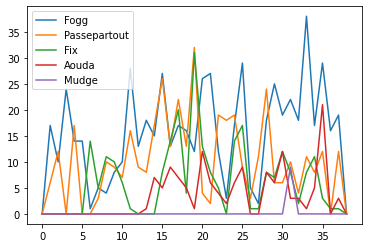

In [22]:
for character in characters:
    #plt.plot(np.convolve(appearances[character], [1, 1, 1, 1, 1, 1, 1, 1, 1]))
    plt.plot(appearances[character])

plt.legend(characters)